# Electric Insights Scraper

This notebook walks through the usage of the electric insights scraper script which is contained within the same repository

<br>

### Imports

In [6]:
## Importing standard modules
import pandas as pd
import numpy as np

from datetime import date, timedelta

import electric_insights_scraper as EI

import matplotlib.pyplot as plt
import matplotlib.transforms as mtf

<br>

### Calling a Single Stream

We start by calling just the generation mix stream 

In [7]:
%%time
df = pd.DataFrame()
EI_caller = EI.Caller()

collect_previous_years = False
if collect_previous_years:
    for year in range(2009, 2019):
        start_date = date(year, 1, 1)
        end_date = date(year, 12, 31)
        
        df_year = EI_caller.call_stream(start_date, end_date, 'generation-mix')
        df = df.append(df_year)
    
start_date = date(2019, 1, 1)
end_date = date(2019, 11, 1)
df = df.append(EI_caller.call_stream(start_date, end_date, 'generation-mix'))

Wall time: 26.3 s


In [8]:
df.head(2)

,nuclear,biomass,coal,gas,hydro,wind,solar,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish,SP
local_datetime,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,6.924,1.116,0,5.853,0.405,11.304,0,27.336,0.000,8.05458,3.14171,0.0,0.182,1.552,0.0,0.0,-0.702,1
2019-01-01 00:30:00+00:00,6.838,1.103,0,6.292,0.388,11.327,0,27.722,0.024,7.86049,3.25389,0.0,0.196,1.554,0.0,0.0,-0.696,2


In [9]:
df.tail(2)

,nuclear,biomass,coal,gas,hydro,wind,solar,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish,SP
local_datetime,,,,,,,,,,,,,,,,,,
2019-10-31 23:00:00+00:00,6.71,2.491,0.249,10.387,0.297,7.566,0,29.362,0.076,0,0,0.462,0.19,1.396,0.0,0.0,-0.170,47
2019-10-31 23:30:00+00:00,6.628,2.48,0.249,8.94,0.287,7.556,4.07e-05,28.046,0.000,4.20387,2.55031,0.466,0.15,1.756,0.0,0.0,-0.008,48


<br>

Now we can visualise the data (after resampling)

C:\Users\ABour\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


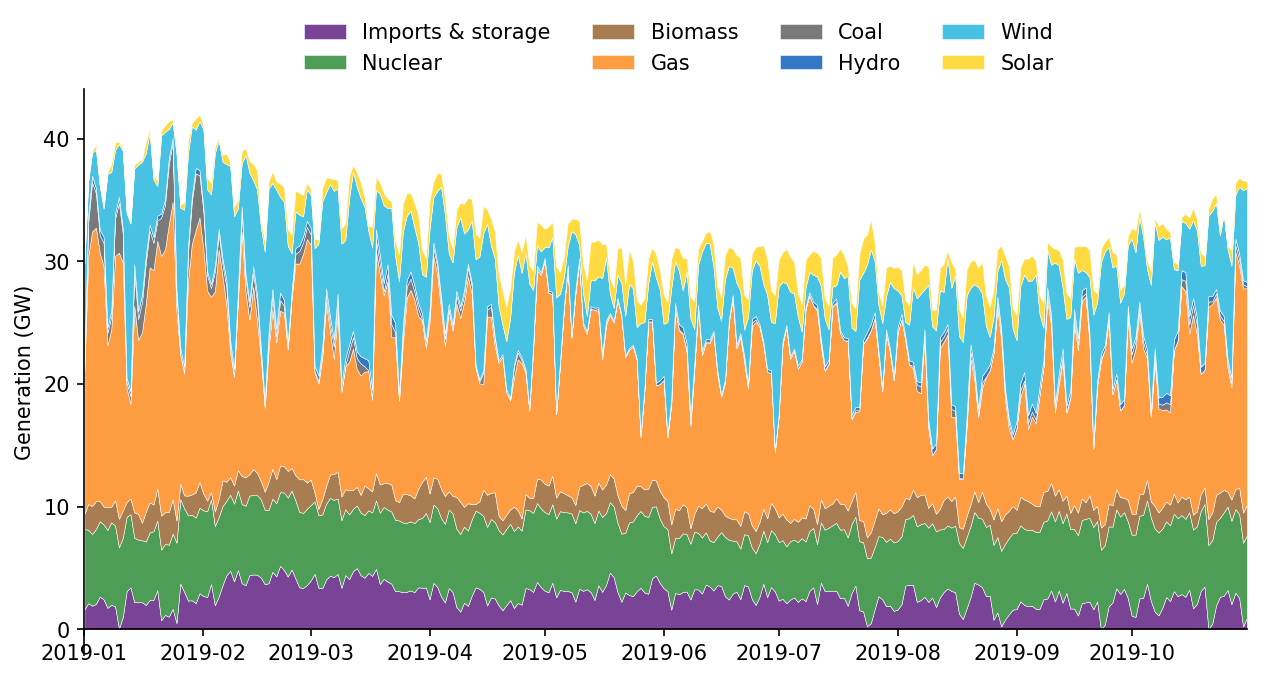

In [10]:
df_resampled = EI.clean_df(df, freq='D')
EI.quick_plot(df_resampled)

<br>

Quick inspection of the nulls

In [11]:
100*df.isnull().sum()/df.shape[0]

nuclear             0.089090
biomass             0.089090
coal                0.089090
gas                 0.089090
hydro               0.089090
wind                0.089090
solar               0.089090
demand              0.089090
pumped_storage      0.089090
windOnshore         0.109649
windOffshore        0.109649
belgian             0.089090
dutch               0.089090
french              0.089090
ireland             0.212445
northern_ireland    0.212445
irish               0.089090
SP                  0.000000
dtype: float64

<br>

### Making a Single Call on Multiple Streams

Often though we want to scrape all of the data available including all of the streams such as market price and current temperature.

In [12]:
start_date = date(2009, 1, 1)
end_date = date(2009, 3, 31)

EI_caller = EI.Caller()
df = EI_caller.call_streams(start_date, end_date)

df.head(2)

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,74.74,-0.6,21278,555,6.973,0,17.65,...,38.329,-0.404,None,None,0.0,0.0,1.977,0.0,0.0,-0.161
2009-01-01 00:30:00+00:00,56.33,2,74.89,74.89,-0.6,21442,558,6.968,0,17.77,...,38.461,-0.527,None,None,0.0,0.0,1.977,0.0,0.0,-0.160


In [13]:
df.tail(2)

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-03-30 23:00:00+01:00,35.27,47,55.73,55.73,7.3,15302,451,8.429,0,12.828,...,38.899,0.123,None,None,0.0,0.0,0.795,0.0,0.0,-0.306
2009-03-30 23:30:00+01:00,30.10,48,56.04,56.04,7.3,14174,444,8.432,0,10.902,...,36.301,-0.601,None,None,0.0,0.0,0.626,0.0,0.0,-0.300


<br>

### Making Multiple Calls on Multiple Streams



In [ ]:
%%time

df_EI = pd.DataFrame()
EI_caller = EI.Caller()

collect_previous_years = False

if collect_previous_years:
    for year in range(2009, 2019):
        start_date = date(year, 1, 1)
        end_date = date(year+1, 1, 1)
        
        EI_caller.call_streams(start_date, end_date)
        df_EI_year = df_EI = df_EI.append(df_EI_year)
    
start_date = date(2019, 1, 1)
end_date = date(2019, 11, 1)

df_EI_2019 = EI_caller.call_streams(start_date, end_date)

if collect_previous_years:
    df_EI = df_EI.append(df_EI_2019)

In [14]:
df_EI.head(2)

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,74.74,-0.6,21278.0,555.0,6.973,0,17.65,...,38.329,-0.404,None,None,0.0,0,1.977,0.0,0.0,-0.161
2009-01-01 00:30:00+00:00,56.33,2,74.89,74.89,-0.6,21442.0,558.0,6.968,0,17.77,...,38.461,-0.527,None,None,0.0,0,1.977,0.0,0.0,-0.16


In [15]:
df_EI.tail(2)

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2019-10-31 23:00:00+00:00,28.11,47,22.7,22.7,8.3,4710.899,160.442034,6.71,2.491,0.249,...,29.362,0.076,0,0,0.462,0.19,1.396,0.0,0.0,-0.17
2019-10-31 23:30:00+00:00,32.18,48,35.0,35.0,8.3,4213.777,150.244986,6.628,2.48,0.249,...,28.046,0,4.20387,2.55031,0.466,0.15,1.756,0.0,0.0,-0.008


<br>

Now we can finally save the data

In [17]:
df_EI.to_csv('data/EI.csv')

<br>

To make sure that's all worked we'll read it back in and plot the timeseries for the full period available

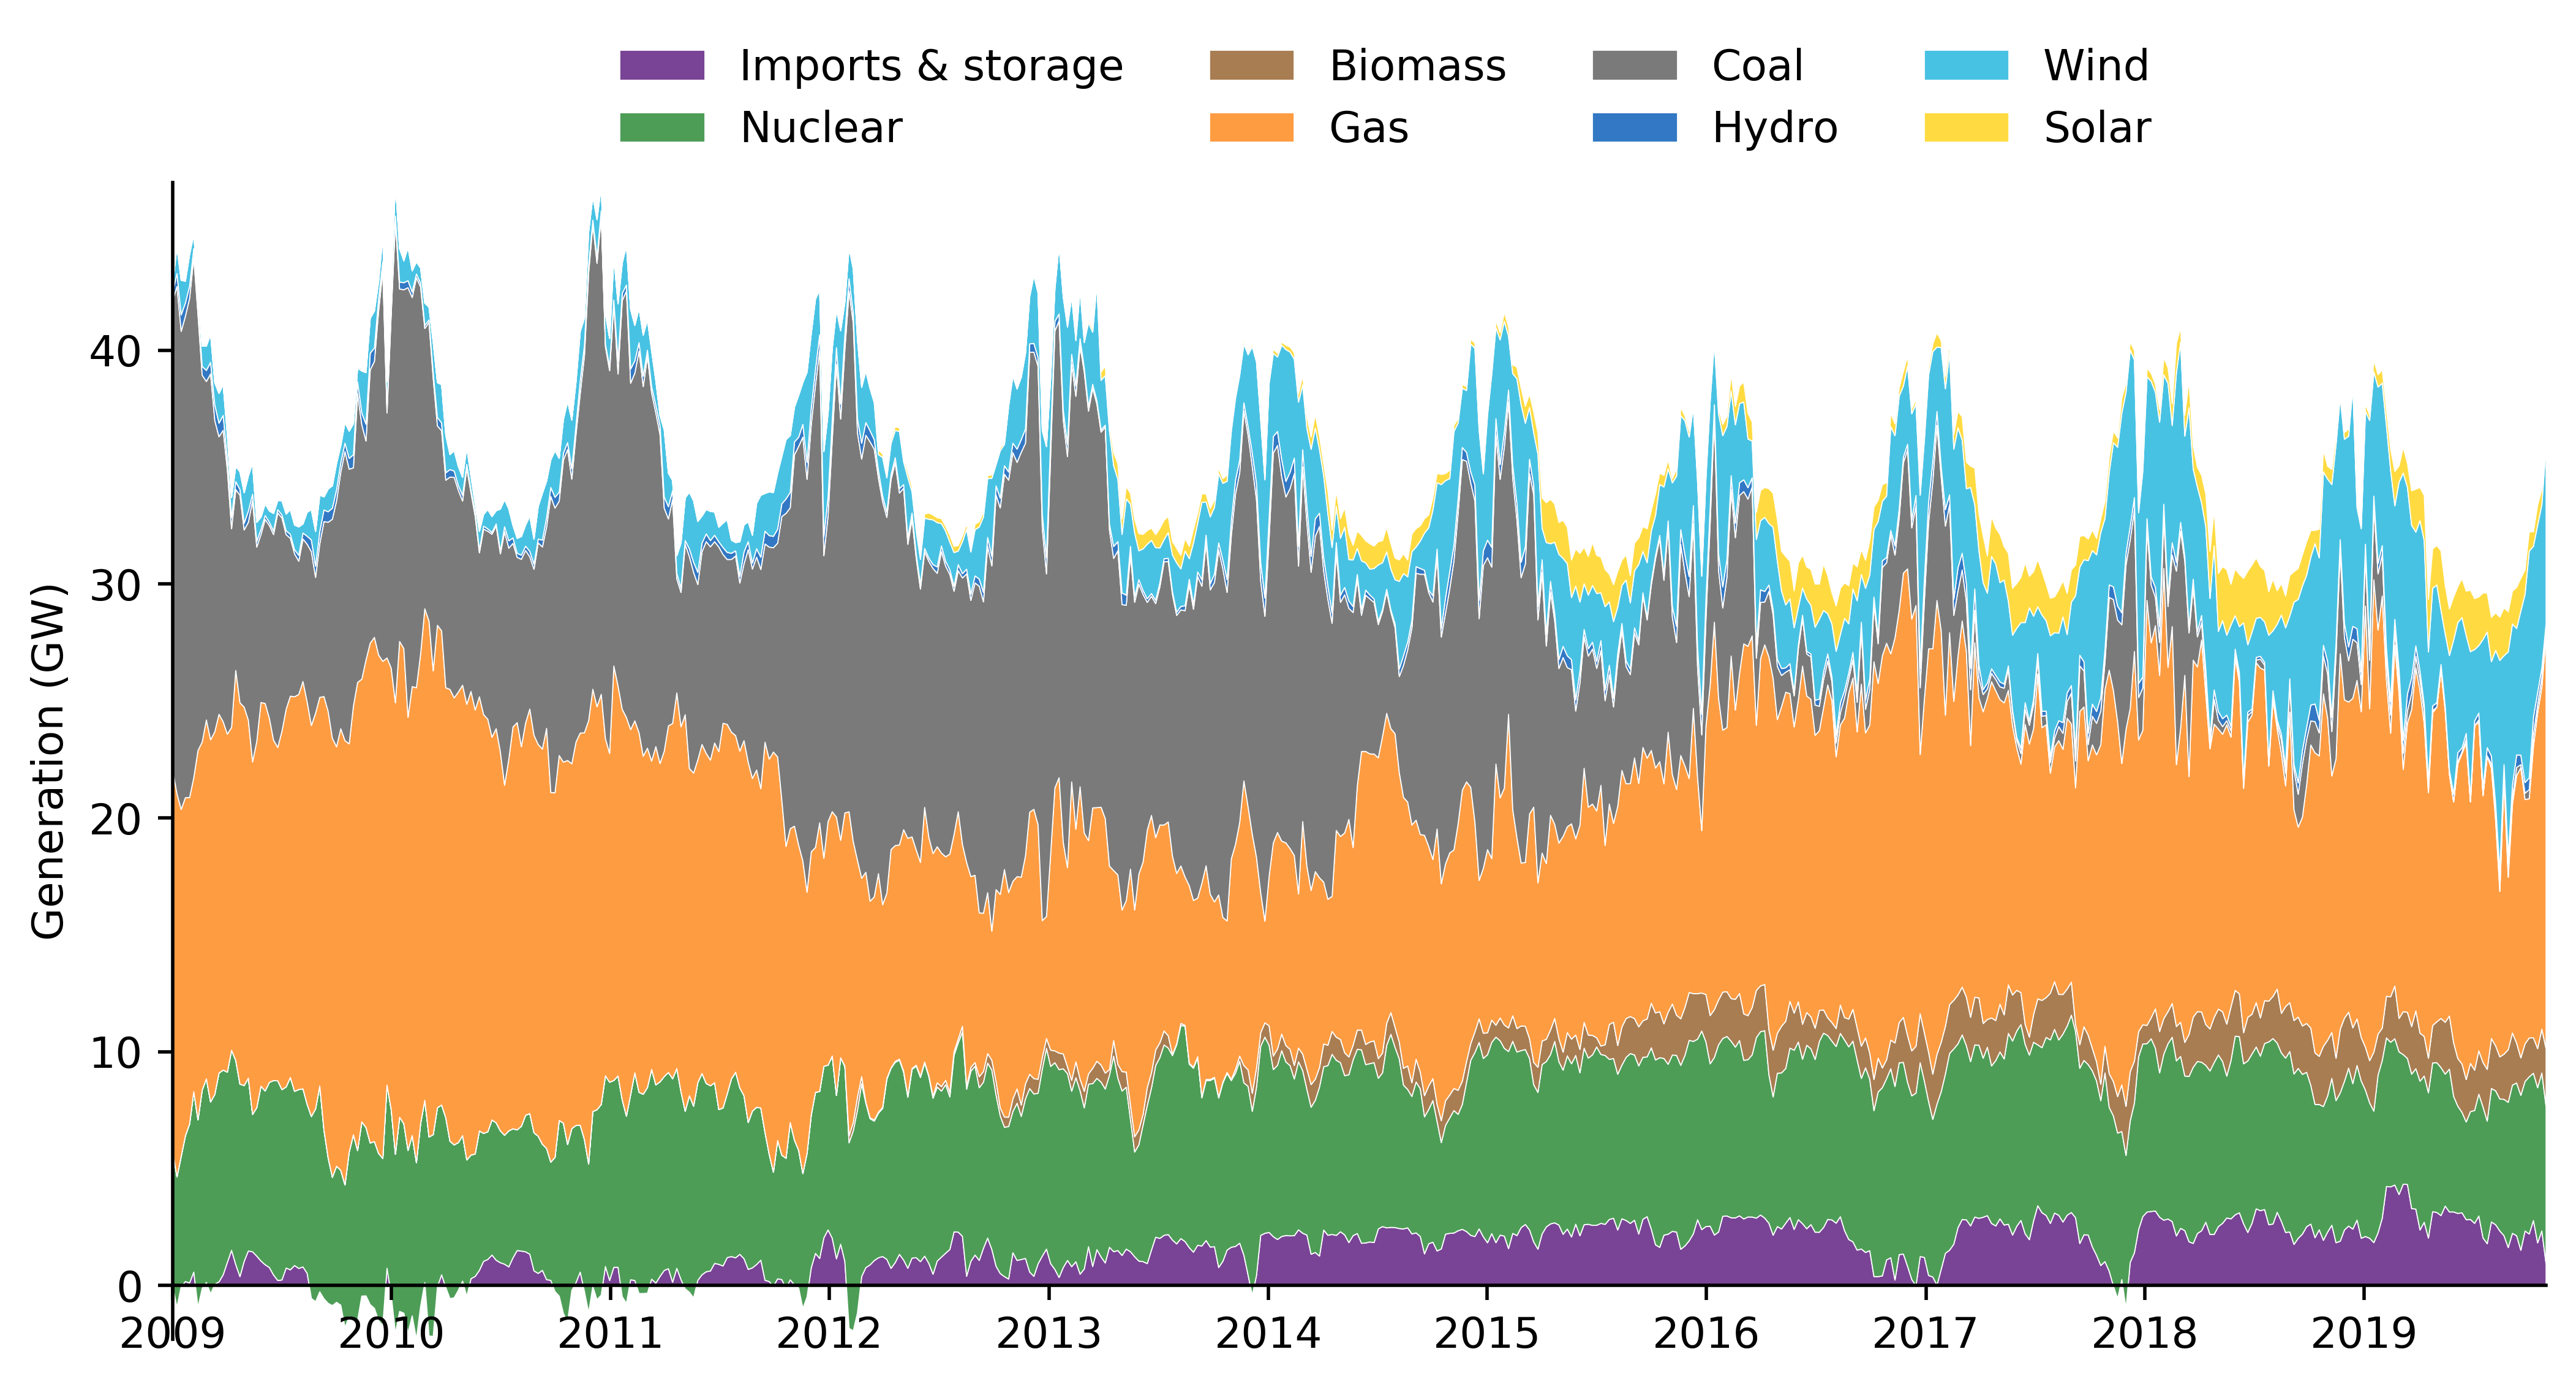

In [18]:
df_EI = pd.read_csv('data/EI.csv')
df_EI['local_datetime'] = pd.DatetimeIndex(pd.to_datetime(df_EI['local_datetime'], utc=True)).tz_convert('Europe/London')
df_EI = df_EI.set_index('local_datetime')
df_EI = df_EI.drop_duplicates()

df_EI_resampled = EI.clean_df(df_EI)
EI.quick_plot(df_EI_resampled, dpi=500)

<br>

There's an issue that some data isn't at standard intervals but it's mostly for imbalance. Temperature also just has lots of unknown values

In [19]:
100*df_EI.isnull().sum()/df_EI.shape[0]

day_ahead_price      0.059509
SP                   0.000000
imbalance_price      0.021065
valueSum             0.021065
temperature          0.087420
TCO2_per_h           0.042657
gCO2_per_kWh         0.042657
nuclear              0.034231
biomass              0.034231
coal                 0.034231
gas                  0.034231
hydro                0.034231
wind                 0.034231
solar                0.034231
demand               0.034231
pumped_storage       0.034231
windOnshore         64.878244
windOffshore        64.878244
belgian              0.006846
dutch                0.034231
french               0.034231
ireland              0.016325
northern_ireland     0.016325
irish                0.034231
dtype: float64